In [2]:
# for fast array manipulation
import numpy as np
# for plotting
import matplotlib.pyplot as plt
# for numerical ODE integration
from scipy.integrate import odeint
# for nonlinear equations
from scipy.optimize import fsolve
# to display plots in-line
%matplotlib inline
plt.style.use('ggplot')


In [3]:
def sigmoid(x, a, thr):
    return 1 / (1 + np.exp(-a * (x - thr)))


In [4]:
# couplings
# couplings
wee = 16
wie = 12
wei= 15
wii = 3

# refractory periods
rE = 0
rI = 0

# external inputs
P = 1.
Q = 1.

# nonlinear functions
def Se(x):
    aE = 1.3
    thrE = 4
    return sigmoid(x, thrE, aE) - sigmoid(0, thrE, aE)

def Si(x):
    aI = 2
    thrI = 3.7
    return sigmoid(x, thrI, aI) - sigmoid(0, thrI, aI)



In [5]:
# this function returns the right hand side of the Wilson-Cowan equation
# (both, in a 2-vector)
def WilsonCowan(y, t):
    E = y[0]
    I = y[1]
    y1 = -E + (1 - rE * E) * Se(wee * E - wie * I + P)
    y2 = -I + (1 - rI * I) * Si(wei * E - wii * I + Q)
    return [y1, y2]


In [6]:
# minimum and maximum E and I values we want displayed in the graph
minval = -.1
maxval = .6
resolution = 50
# State variables
x1 = np.linspace(minval, maxval, resolution)
x2 = np.linspace(minval, maxval, resolution)
# Create a grid for evaluation of the vector field
x1, x2 = np.meshgrid(x1, x2)
# Evaluate the slopes
X1, X2 = WilsonCowan([x1, x2], 0)
# Compute the magnitude vector
M = np.hypot(X1, X2)
# Normalize the slopes vectors (for the field plot)
#X1, X2 = X1/M, X2/M

In [8]:
fixed_p = []
y1 = x1.ravel()
y2 = x2.ravel()
for i in range(resolution**2):
    # find a zero
    sol, infodict, ier, mesg = fsolve(WilsonCowan,
                                      [y1[i], y2[i]],
                                      args=(0),
                                      full_output=1)
    if ier == 1: # I exclude the cases where fsolve didn't converge
        fixed_p.append(sol)

fixed_p = np.array(fixed_p).T


C:\Users\saighi\AppData\Local\Temp\ipykernel_680\2407072148.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a * (x - thr)))


In [9]:
# simulation duration and step size
time = np.linspace(0, 100, 2000)

# starting point, hopefully inside the basin of attraction of our attractor
E0, I0 = 0.39, 0.49 # try changing this

# find the solution with scint.odeint
odesol = odeint(WilsonCowan, [E0, I0], time)
# separate the two solutions
exc_timeseries, inh_timeseries = odesol.T


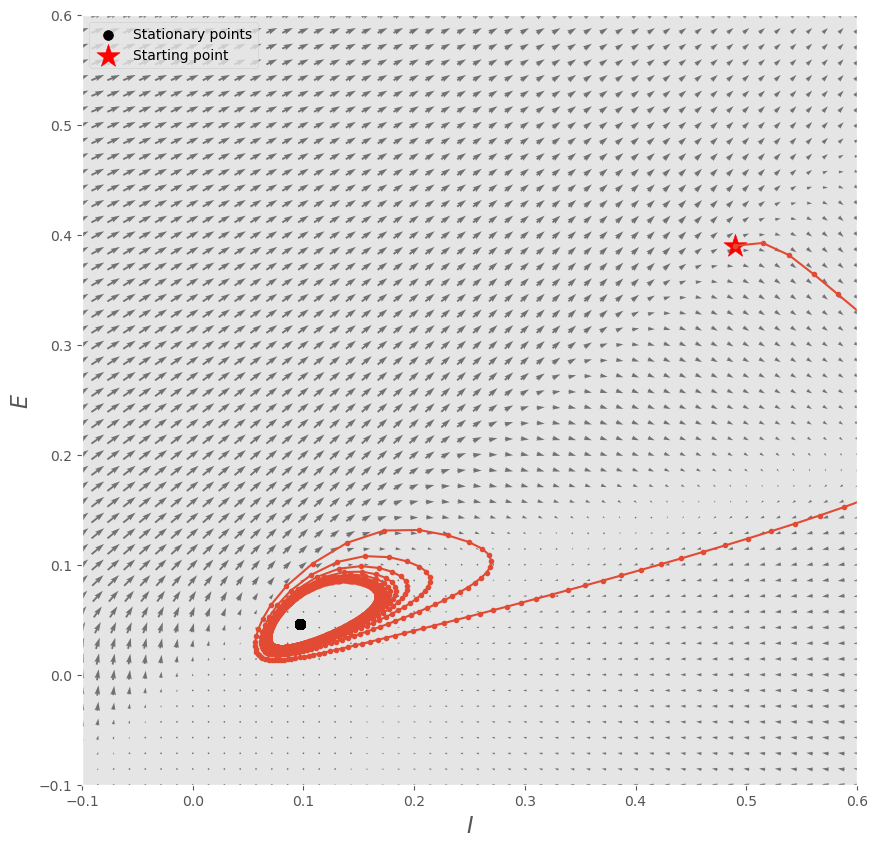

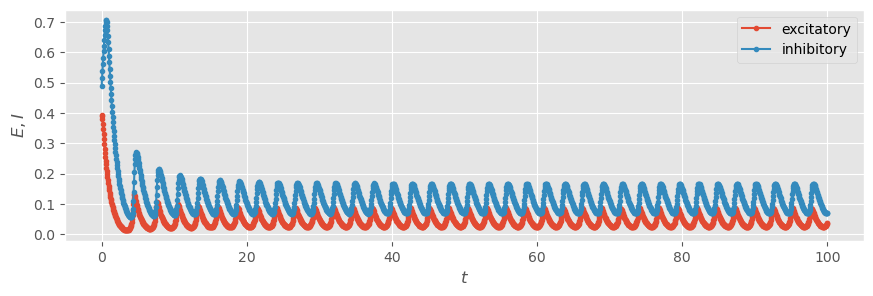

In [10]:
# plotting the vector field in the state space (E, I)
plt.figure(figsize=(10, 10))
plt.quiver(x2, x1, X2, X1, pivot='mid', alpha=.5)
plt.xlim([minval, maxval])
plt.ylim([minval, maxval])
plt.xlabel(r'$I$', fontsize=16) # yes, you can use Latex code!
plt.ylabel(r'$E$', fontsize=16)
plt.grid()

# plot the solution in the state space
plt.plot(inh_timeseries, exc_timeseries, '.-');

# plot the fixed points we identified
plt.scatter(fixed_p[1], fixed_p[0], marker='o', c='k', s=50,
            label="Stationary points")

# plot the starting point
plt.scatter(I0, E0, marker='*', c='r', s=300, label="Starting point")
plt.legend(loc="upper left")

# plot the solution in time
plt.figure(figsize=(10.3,3))
plt.ylabel(r'$E, I$')
plt.xlabel(r'$t$')
plt.plot(time, exc_timeseries, '.-', label="excitatory");
plt.plot(time, inh_timeseries, '.-', label="inhibitory");
plt.legend();
